<a href="https://www.kaggle.com/code/sarapereirabarros/michelin-star-in-singapore?scriptVersionId=189874639" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


   # **Michelin Star Data for 'The Orchid Luxe Hotel'**

**Michelin stars are prestigious awards given by the Michelin Guide to exceptional restaurants.** Established in 1926 by the French tire company Michelin, the stars were initially meant to encourage road travel and tire sales by highlighting outstanding dining establishments. The rating system evolved to its current form in 1931, with one star indicating a "very good restaurant," two stars denoting "excellent cooking that is worth a detour," and three stars representing "exceptional cuisine that is worth a special journey." Today, Michelin stars are a global hallmark of culinary excellence.

**Scenario:**
The Orchid Luxe Hotel is a successful luxury hotel company located in Singapore, with three other hotels in Asia. As part of its ambitious growth plans, the company aims to establish a Michelin star restaurant. To achieve this, the owners believe that analyzing data about Michelin restaurants and their cuisine types could provide valuable insights and unlock new growth opportunities.

**Business Task:**
Analyze Michelin Star data to gain insights into trends in cuisine types and price ranges, with special focus in Singapore region, providing recommendations for the new luxury hotel's restaurant strategies.

**Stakeholders:**
- The Orchid Luxe Hotel marketing analytics team.

**Desired Insights:**
1. What are some trends in cuisine types among Michelin star restaurants worldwide and in Singapore?
2. What are the common price ranges for these restaurants?
3. How can these trends and insights be applied to The Orchid Luxe Hotel's new restaurant strategy?

**Data Set:**
- Data Set Used: Michelin Restaurants
- Uploaded By: Jacky Wang, Private Notebook
- Year: 2019
- License: Data files © Original Authors
- Format: 3 CSV files in long format
- Regions Included: Austria, California, Chicago, Croatia, Czech Republic, Denmark, Finland, Greece, Hong Kong, Hungary, Iceland, Macau, Norway, New York City, Poland, Ireland, Rio de Janeiro, Sao Paulo, South Korea, Singapore, Sweden, Taipei, Thailand, Washington DC, United Kingdom
- Regions Excluded: Belgium, France, Germany, Italy, Japan, Luxembourg, Netherlands, Portugal, China, Spain, Switzerland

* The combined data for both one-star two-star and three-star Michelin Restaurants contain the following **columns**:
1. name: Restaurant name

1. year: Awarded year
1. latitude: Latitude of restaurant
1. longitude: Longitude of restaurant
1. city: City where the restaurant is located
1. region: Region where the restaurant is located
1. zipCode: Postal code of the restaurant's location
1. cuisine: Type of cuisine served at the Michelin restaurant
1. price: Price range of the restaurant
1. url: URL to the restaurant's Michelin guide page

**ROCCC Analysis:**
- Reliability: Low (non-verified source)
- Originality: Low 
- Comprehensiveness: Medium 
- Currency: Low (data from 2018 to 2019)
- Citation: Low

**Data Limitations:**
- Small sample size (does not include all or many of the Michelin-awarded restaurants globally for the years of 2018 and 2019)
- Outdated data (2018 and 2019)

**Project Process:**

1. **Data Collection:**
   - Gather Michelin Stars data, including details on awarded restaurants, their locations, types of cuisine, and price ranges.


2. **Data Processing and Analysis:**
   - Utilize Python, Pandas, Matplotlib, and Seaborn for data processing, analysis, and visualization.
   - Analyze trends and patterns, such as popular types of cuisine, price ranges, and geographic distribution.


3. **Insights and Recommendations:**
   - Based on the analysis, provide actionable recommendations for the type of cuisine and price range that would be most suitable for this new luxury hotel in Singapore.

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load the standard libraries to visualize data set
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from bokeh.plotting import figure, output_notebook, show, save 
from bokeh.models import ColumnDataSource, HoverTool

output_notebook() #specify the Bokeh plots should be embedded within the Jupyter noteboo import pandas as pd

import pandas_bokeh 
pd.set_option('plotting.backend', 'pandas_bokeh')
import warnings 
warnings.filterwarnings('ignore')

/kaggle/input/michelin-star-restaurants/one-star-michelin-restaurants.csv
/kaggle/input/michelin-star-restaurants/three-stars-michelin-restaurants.csv
/kaggle/input/michelin-star-restaurants/two-stars-michelin-restaurants.csv


Loading BokehJS ...

ModuleNotFoundError: No module named 'pandas_bokeh'

In [ ]:
# Load the three Michelin Stars dataset

one_star = pd.read_csv('/kaggle/input/michelin-star-restaurants/one-star-michelin-restaurants.csv')
two_stars = pd.read_csv('/kaggle/input/michelin-star-restaurants/two-stars-michelin-restaurants.csv')
three_stars = pd.read_csv('/kaggle/input/michelin-star-restaurants/three-stars-michelin-restaurants.csv')


In [7]:
# Display the first 5 rows of one dataset

one_star.head(5)


,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...
1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...


In [8]:
#join the three tables for an easier analysis

one_star['Michelin stars'] = 1
two_stars['Michelin stars'] = 2
three_stars['Michelin stars'] = 3

michelin_stars = pd.concat([one_star,two_stars,three_stars],axis=0)
michelin_stars

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin stars
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
...,...,...,...,...,...,...,...,...,...,...,...
31,Fat Duck,2019,51.508280,-0.702320,Bray,United Kingdom,SL6 2AQ,Creative,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3
32,Waterside Inn,2019,51.507730,-0.701210,Bray,United Kingdom,SL6 2AT,Classic French,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3
33,Alain Ducasse at The Dorchester,2019,51.507120,-0.152520,Mayfair,United Kingdom,W1K 1QA,French,NaN,https://guide.michelin.com/gb/en/greater-londo...,3
34,The Araki,2019,51.511826,-0.140389,Mayfair,United Kingdom,W1S 3BF,Japanese,NaN,https://guide.michelin.com/gb/en/greater-londo...,3


In [9]:
michelin_stars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 35
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            695 non-null    object 
 1   year            695 non-null    int64  
 2   latitude        695 non-null    float64
 3   longitude       695 non-null    float64
 4   city            693 non-null    object 
 5   region          695 non-null    object 
 6   zipCode         501 non-null    object 
 7   cuisine         695 non-null    object 
 8   price           519 non-null    object 
 9   url             695 non-null    object 
 10  Michelin stars  695 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 65.2+ KB


# **Data Cleaning and Preprocessing**

In [10]:
#Drop columns

michelin_stars = michelin_stars.drop(columns=['url','zipCode'])

* Some columns were omitted, such as ‘url’ and ’zipCode’ because of their low relevance for this analysis

In [11]:
#Duplicates

duplicates_stars = michelin_stars[michelin_stars.duplicated()].copy()
duplicates_stars

,name,year,latitude,longitude,city,region,cuisine,price,Michelin stars


* Data shows has 0 duplicates.

In [12]:
#Missing values

michelin_stars.isna().sum()

name                0
year                0
latitude            0
longitude           0
city                2
region              0
cuisine             0
price             176
Michelin stars      0
dtype: int64

* Data shows missing values on columns 'city' and 'price' that needs handling.

In [13]:
print(michelin_stars['price'].unique())

['$$$$$' '$$$$' '$$$' '$$' '$' nan]


In [14]:
#Handling missing values (NaN values) on the 'price' column
 
michelin_stars['price'].fillna('', inplace=True)
print(michelin_stars['price'].unique())

['$$$$$' '$$$$' '$$$' '$$' '$' '']


/tmp/ipykernel_33/3430188342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  michelin_stars['price'].fillna('', inplace=True)


In [15]:
# Locate the missing values in the 'city' column
missing_values = michelin_stars[michelin_stars['city'].isna()]
print(missing_values)

      name  year   latitude   longitude city     region     cuisine price  \
152  Épure  2019  22.295830  114.169304  NaN  Hong Kong      French   $$$   
166  Arbor  2019  22.283146  114.155420  NaN  Hong Kong  Innovative   $$$   

     Michelin stars  
152               1  
166               1  


In [16]:
#Handling missing values (NaN values) on the 'city' column  

michelin_stars['city'].fillna('', inplace=True)
missing_values = michelin_stars[michelin_stars['city'].isna()]
print(missing_values)

Empty DataFrame
Columns: [name, year, latitude, longitude, city, region, cuisine, price, Michelin stars]
Index: []


/tmp/ipykernel_33/1127807254.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  michelin_stars['city'].fillna('', inplace=True)


In [17]:
michelin_stars.isna().sum()

name              0
year              0
latitude          0
longitude         0
city              0
region            0
cuisine           0
price             0
Michelin stars    0
dtype: int64

* Data is now clean and there is no further missing values.

In [18]:
print(michelin_stars['year'].unique())

[2019 2018]


* There is only two years of data available, which limits the analysis scope.

In [19]:
print(michelin_stars['region'].unique())

['Austria' 'California' 'Chicago' 'Croatia' 'Czech Republic' 'Denmark'
 'Finland' 'Greece' 'Hong Kong' 'Hungary' 'Macau' 'Norway' 'New York City'
 'Poland' 'Ireland' 'Rio de Janeiro' 'Sao Paulo' 'South Korea' 'Singapore'
 'Sweden' 'Taipei' 'Thailand' 'Washington DC' 'United Kingdom']


* The column 'region' consists on a mix of cities and countries names, which can be misleading.

# **Summary Statistics**

In [20]:
michelin_stars.sample(10)

,name,year,latitude,longitude,city,region,cuisine,price,Michelin stars
534,Lyle's,2019,51.523780,-0.077040,Shoreditch,United Kingdom,Modern British,,1
411,Loch Bay,2019,57.514870,-6.571140,Waternish,United Kingdom,Modern cuisine,,1
514,Amaya,2019,51.499120,-0.157310,Belgravia,United Kingdom,Indian,,1
353,Mathias Dahlgren-Matbaren,2019,59.329350,18.075430,Stockholm,Sweden,Modern cuisine,$$,1
347,Upper House,2019,57.697450,11.990210,Göteborg,Sweden,Creative,$$$$,1
29,Sun Tung Lok,2019,22.300990,114.172210,Hong Kong,Hong Kong,Cantonese,$$,2
323,Imperial Treasure Fine Teochew Cuisine (Orchard),2018,1.303245,103.834900,Singapore,Singapore,Chinese,$,1
6,Baumé,2019,37.428500,-122.142720,South San Francisco,California,Contemporary,$$$$,2
103,360º,2019,42.641563,18.111523,Dubrovnik,Croatia,Modern cuisine,$$$$$,1
269,L'Ecrivain,2019,53.336270,-6.248340,City Centre,Ireland,Modern cuisine,,1


In [21]:
#Statistics
michelin_stars.describe(include='all',)

,name,year,latitude,longitude,city,region,cuisine,price,Michelin stars
count,695,695.000000,695.000000,695.000000,695,695,695,695,695.000000
unique,684,NaN,NaN,NaN,180,24,70,6,NaN
top,L'Atelier de Joël Robuchon,NaN,NaN,NaN,New York,United Kingdom,Modern cuisine,$$$$,NaN
freq,3,NaN,NaN,NaN,74,162,108,197,NaN
mean,NaN,2018.943885,37.260124,4.417000,NaN,NaN,NaN,NaN,1.261871
std,NaN,0.230310,18.025875,81.095189,NaN,NaN,NaN,NaN,0.545270
min,NaN,2018.000000,-23.634005,-123.719444,NaN,NaN,NaN,NaN,1.000000
25%,NaN,2019.000000,25.040718,-73.982920,NaN,NaN,NaN,NaN,1.000000
50%,NaN,2019.000000,40.727130,-0.149570,NaN,NaN,NaN,NaN,1.000000
75%,NaN,2019.000000,51.508962,100.578855,NaN,NaN,NaN,NaN,1.000000


# **Data Visualization**

* **Distribution of Michelin Stars Restaurants Worldwide:**

In [22]:
# Count the Michelin Restaurants Worldwide 
star_counts = michelin_stars['Michelin stars'].value_counts()
star_counts

Michelin stars
1    549
2    110
3     36
Name: count, dtype: int64

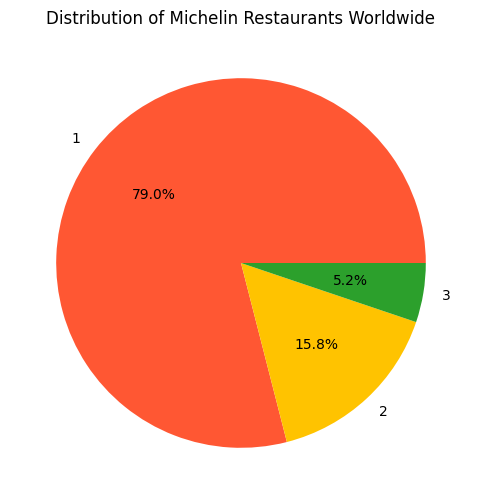

In [23]:
# Plotting 
colors = ['#FF5733', '#FFC300', '#2ca02c']
star_counts.plot(kind='pie', figsize=(10, 6), colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Michelin Restaurants Worldwide')
plt.ylabel('')
plt.show()

**Conclusion:** 

* The above plot provides a clear and visual representation of the distribution of Michelin stars worldwide, emphasizing the relative rarity of two and three-star establishments compared to one-star restaurants. This insight aligns with the difficulty to meet the expectations of Michelin Guide standards.

* **Distribution of the Price Range Worldwide ($):**

In [24]:
#Arranging price($) into 5 different groups (Inexpensive, Moderate, Expensive, Very Expensive, Luxury):

def price_group(price_symbol):
    return ('Inexpensive' if price_symbol == '$' 
            else 'Moderate' if price_symbol == '$$' 
            else 'Expensive' if price_symbol == '$$$' 
            else 'Very Expensive' if price_symbol == '$$$$' 
            else 'Luxury' if price_symbol == '$$$$$' 
            else 'Unknown')

price_group_counts = michelin_stars.copy()
michelin_stars['price_group'] = michelin_stars['price'].apply(price_group)
price_group_counts = michelin_stars['price_group'].value_counts()
print(price_group_counts)

price_group
Very Expensive    197
Unknown           176
Expensive         143
Moderate           75
Luxury             73
Inexpensive        31
Name: count, dtype: int64


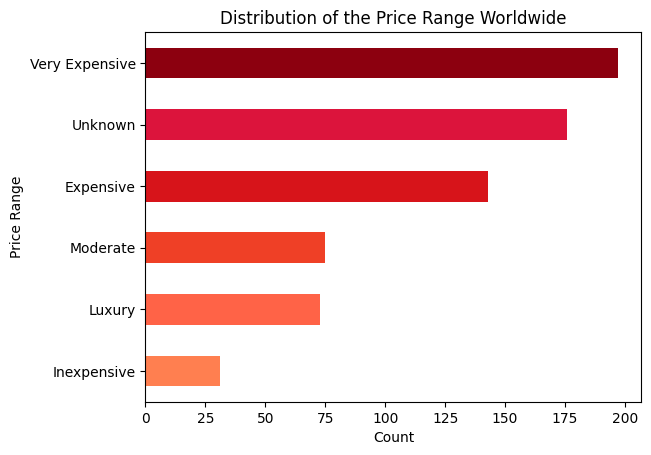

In [25]:
# Plotting in a horizontal bar chart for a better reading

colors = ['#FF7F50', '#FF6347', '#EF4026', '#D7141A', '#DC143C', '#8C000F'] 
price_group_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Distribution of the Price Range Worldwide')
plt.xlabel('Count')
plt.ylabel('Price Range')
plt.show()

**Conclusion:** 
* The above plot refelects the analysis of price groups among Michelin restaurants, showing a clear trend towards high-end and luxury dining experiences. 

* The predominance of 'Very Expensive' and 'Luxury' categories emphasizes the association of Michelin stars with premium pricing. 

* However, the presence of 'Moderate' and 'Expensive' categories indicates that Michelin recognition is also achievable for restaurants that offer exceptional quality at relatively lower price points. 

* With only a few restaurants in the 'Inexpensive' category, it is evident that Michelin-starred dining is less common at the lower end of the price spectrum. This reflects the perception that Michelin recognition is typically associated with more costly dining experiences.

* The significant 'Unknown' category highlights the need for more consistent data collection in future analyses.

* **Distribution of Price Range($) by Michelin Stars Worldwide:**

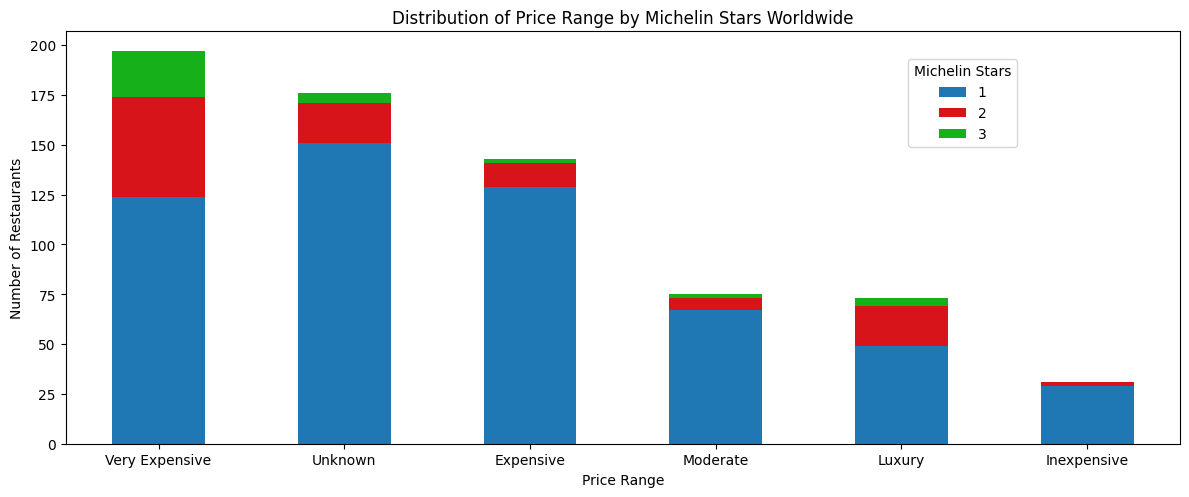

In [26]:

pivot_table = michelin_stars.pivot_table(index='price_group', columns='Michelin stars', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by='Total', ascending=False)
pivot_table = pivot_table.drop(columns='Total') 

#Plotting a stacked bar chart
colors = ['#1f77b4', '#D7141A', '#15B01A']
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Distribution of Price Range by Michelin Stars Worldwide')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.legend(title='Michelin Stars', loc='upper left', bbox_to_anchor=(0.75, 0.95))  # Adjusted to put legend inside
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()



**Conclusion:** 

* The above plot illustrates the diversity of price points among Michelin restaurants, showing a notable inclination towards 'Very Expensive' dining experiences. 

* One-star restaurants are the most common across all price groups, while two-star and three-star establishments are more prevalent in the 'Very Expensive' and 'Luxury' categories. 

* The significant 'Unknown' category highlights the need for more consistent data collection in future analyses.

* **Number of Michelin Restaurants by Cities Worldwide:**

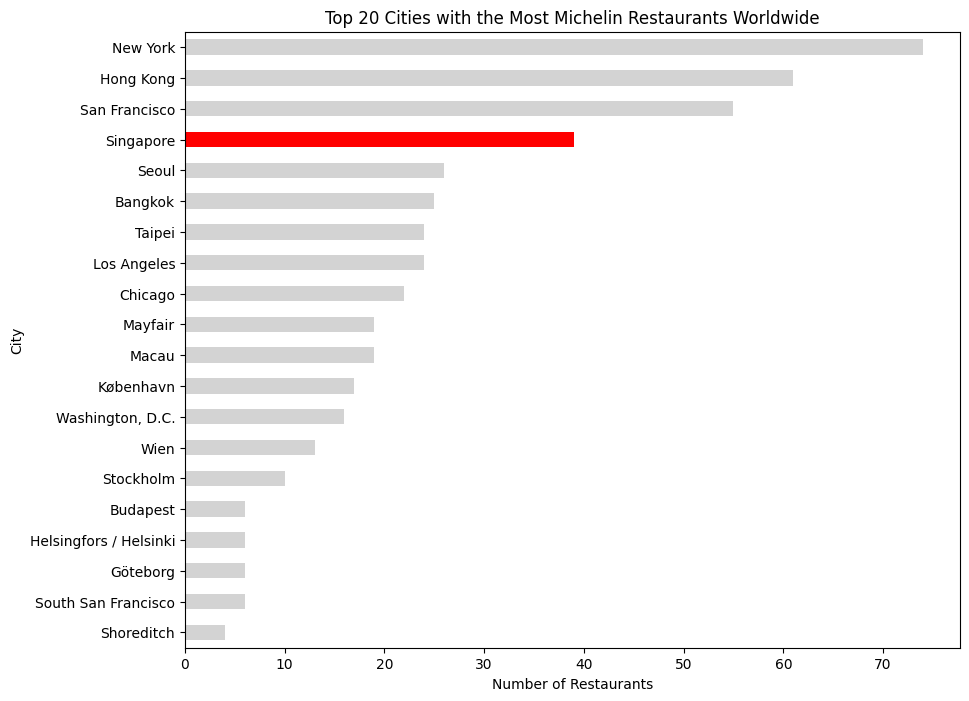

In [27]:
city_counts = michelin_stars['city'].value_counts().sort_values(ascending=False).head(20)

# Plotting an horizontal bar chart
palette = ['lightgrey' if city != 'Singapore' else 'red' for city in city_counts.index]
plt.figure(figsize=(10, 8))
city_counts.plot(kind='barh', color=palette)
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title('Top 20 Cities with the Most Michelin Restaurants Worldwide')
plt.gca().invert_yaxis()  # Inverted the y-axis for the highest count on top
plt.show()

**Conclusion:** 

* The above plot above provides a clear visualization of the distribution of Michelin restaurants by cities, showing the more predominantly concentrated in specific continents, such as America and Asia, reflecting the culinary reputation and gastronomic culture of these regions. 
Singapore's position on the top 5, highlighted in red, accentuates its importance and recognition in the global culinary landscape.
Despite being a relatively small city-state, Singapore's high number of Michelin restaurants highlights its culinary excellence and the quality of its dining establishments.

   * **Distribution of the Top 15 Michelin Star Cuisines *Worldwide***:

The top 15 Michelin Star Cuisines Worldwide are:
cuisine
Modern cuisine         108
Contemporary            75
Japanese                54
Creative                46
Cantonese               40
Modern British          38
French                  29
Innovative              28
Italian                 21
French contemporary     19
Sushi                   17
Chinese                 15
Classic cuisine         15
Californian             14
Thai                    13
Name: count, dtype: int64


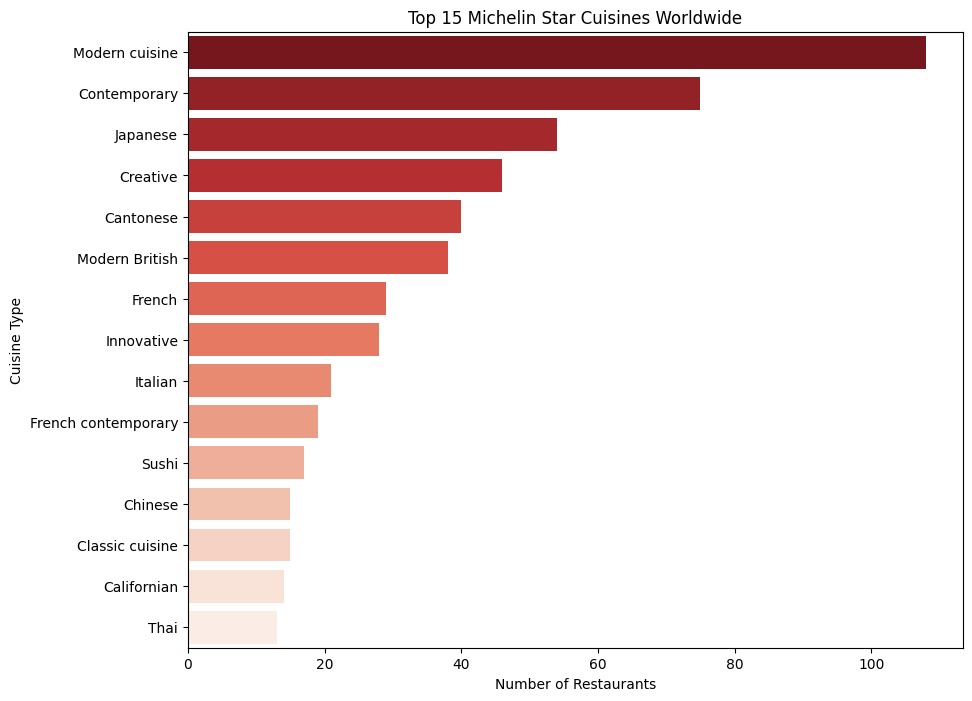

In [28]:
cuisine_counts = michelin_stars['cuisine'].value_counts().head(15)
print("The top 15 Michelin Star Cuisines Worldwide are:")
print(cuisine_counts)

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='Reds_r')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Top 15 Michelin Star Cuisines Worldwide')
plt.show()

**Conclusion:**

* The above plot reveals the rich diversity of cuisines celebrated by Michelin stars, ranging from traditional to innovative culinary styles. It shows that the cuisines that are the most popular in Michelin Restaurants are Modern Cuisine, Contemporary, Japanese, Creative and Cantonese.

* An interesting point is that the world famous cuisines such as the Italian, French and British are NOT on the top of the list.

* **Distribution of the Top 10 Michelin Star Cuisines in the *USA***(top michelin awarded cities-New York and San Francisco):

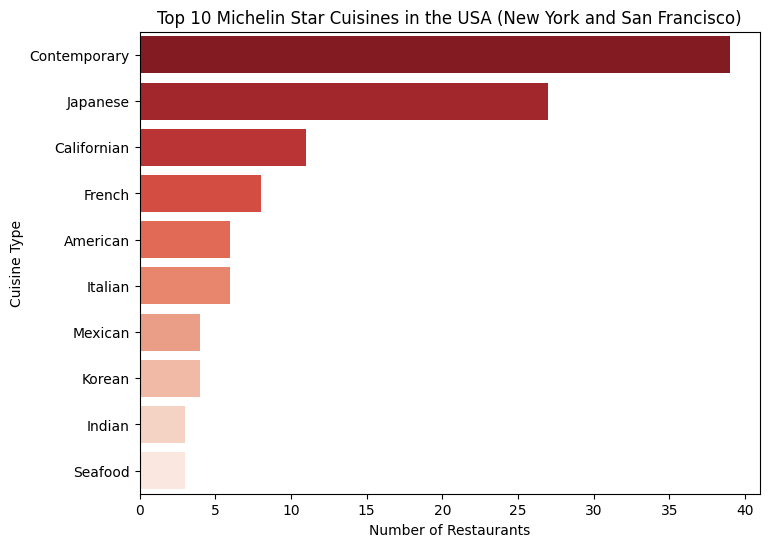

In [29]:
#Finding the top 10 awarded cuisines in USA (top cities-New York and San Francisco)  to compare with the top 5 Singapore awarded cuisines

usa_restaurants = michelin_stars[(michelin_stars['city'] == 'New York') | (michelin_stars['city'] == 'San Francisco')]
cuisine_counts_usa = usa_restaurants['cuisine'].value_counts().head(10)

# Plotting the findings for USA (New York and San Francisco)
plt.figure(figsize=(8, 6))
sns.barplot(x=cuisine_counts_usa.values, y=cuisine_counts_usa.index, palette='Reds_r')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Michelin Star Cuisines in the USA (New York and San Francisco)')
plt.show()


**Conclusion:**

* The above plot reveals that the cuisines that are the most popular in USA Michelin Restaurants are Contemporary, Japonese and French.

* **Distribution of the Top 10 Michelin Star Cuisines in *Singapore***:

(39, 10)


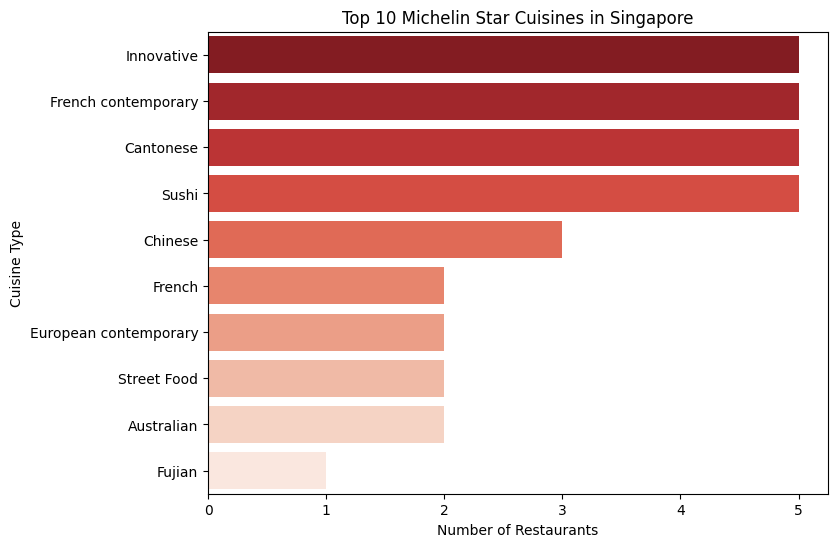

In [30]:
singapore_restaurants = michelin_stars[michelin_stars['city'] == 'Singapore']
cuisine_counts_singapore = singapore_restaurants['cuisine'].value_counts().head(10)
print(singapore_restaurants.shape)

#Plotting a horizontal bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=cuisine_counts_singapore.values, y=cuisine_counts_singapore.index, palette='Reds_r')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Michelin Star Cuisines in Singapore')
plt.show()

**Conclusion:**

* The above plot reveals that the cuisines that are the most popular in Singapore Michelin Restaurants are Innovative, French contemporary, Cantonese and Sushi.

* **Distribution of Cuisine by Michelin Star Restaurants in Singapore:**

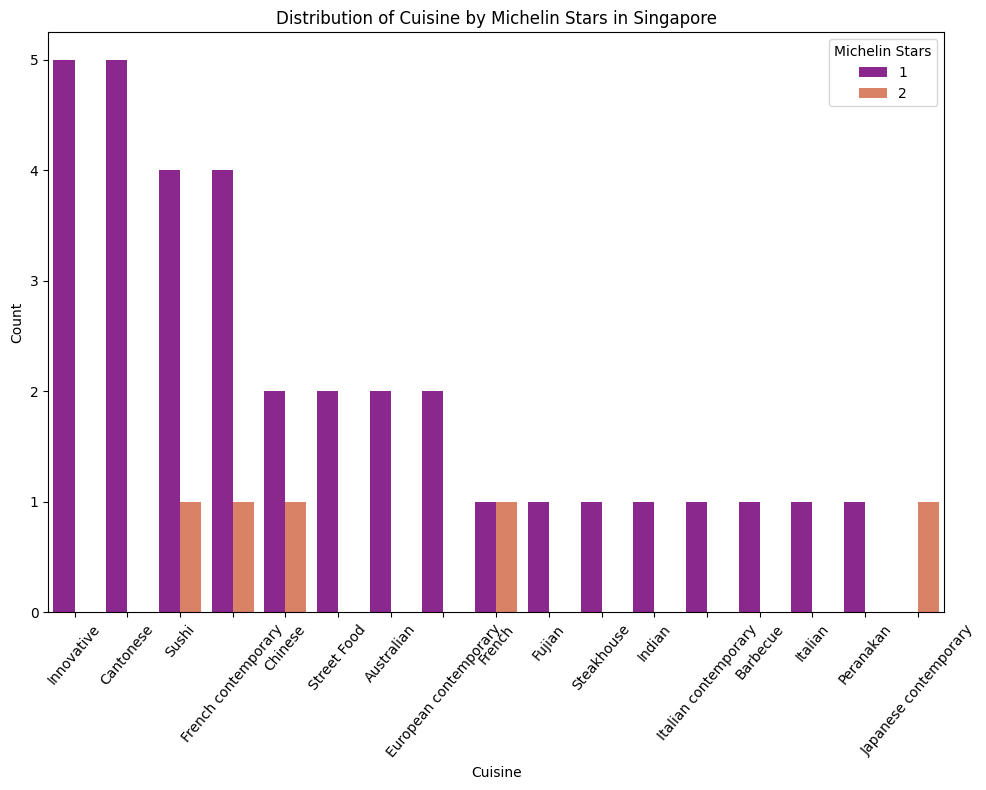

In [31]:
# Plotting 
cuisine_counts_sin = singapore_restaurants['cuisine'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(10, 8))
sns.countplot(x='cuisine', hue='Michelin stars', data=singapore_restaurants, order= cuisine_counts_sin, palette='plasma')
plt.title('Distribution of Cuisine by Michelin Stars in Singapore')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.legend(title='Michelin Stars')
plt.tight_layout()
plt.show()


**Conclusion:**

* The above plot shows that the majority of Michelin restaurants in Singapore have earned a single star. In contrast, only a select few establishments, including those specializing in Sushi, Chinese, French, and Japanese cuisines, have achieved a two-star rating.

* **Distribution of Cuisine by Price Range in Singapore:**

price_group
Inexpensive       16
Moderate          11
Expensive          7
Very Expensive     3
Luxury             2
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

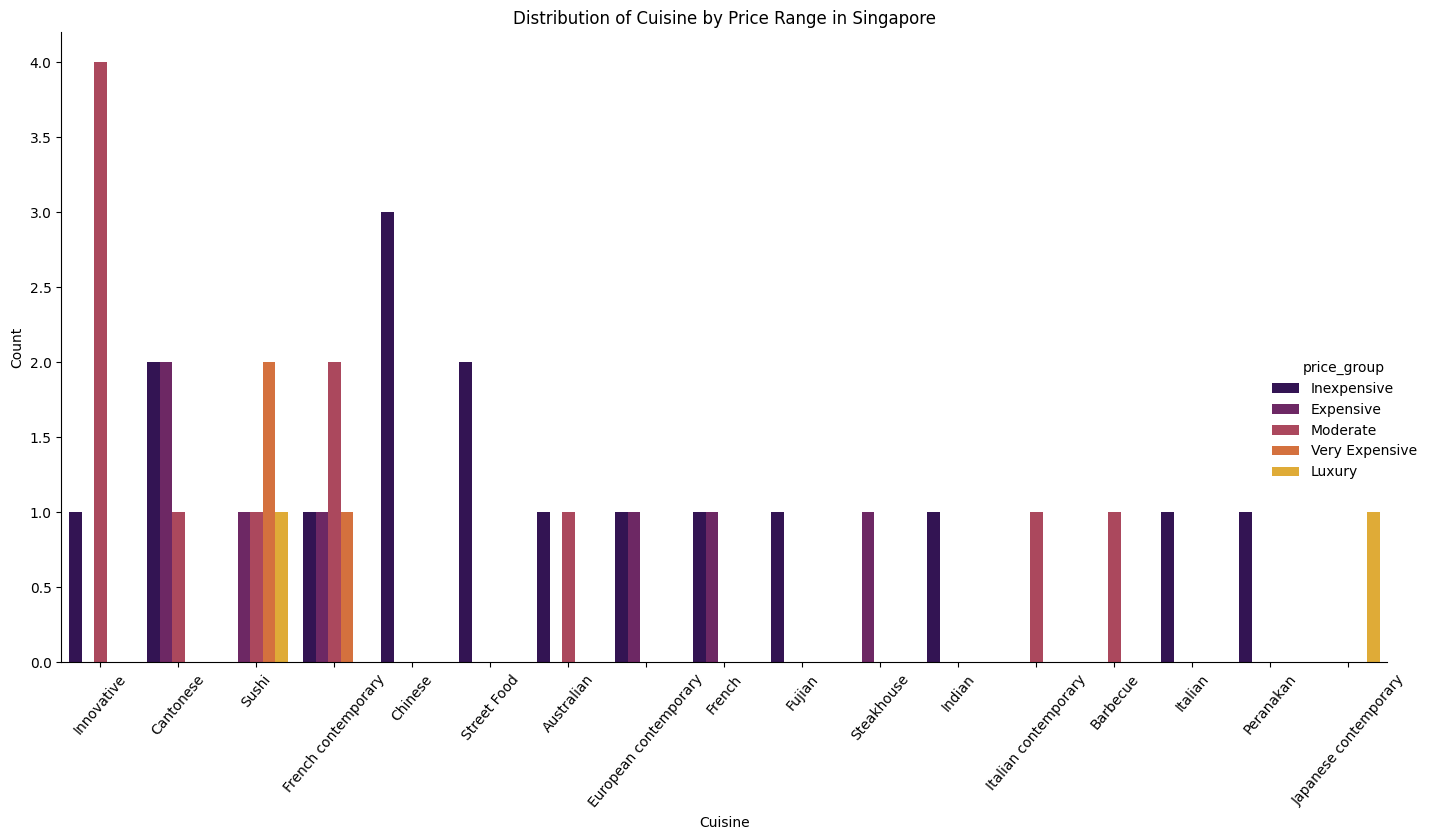

In [32]:
# Plotting 
price_range_singapore = singapore_restaurants['price_group'].value_counts()
print(price_range_singapore)

 
cuisine_counts_sin = singapore_restaurants['cuisine'].value_counts().head(20).sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
sns.catplot(x='cuisine', hue='price_group', data=singapore_restaurants,kind= 'count', order=cuisine_counts_sin, palette='inferno', height=8.5, aspect=1.5)
plt.title('Distribution of Cuisine by Price Range in Singapore')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

**Conclusion:**

In the above plot, we observe that:

* There are 16 cuisines that fall into the "Inexpensive" category. This suggests a strong presence of affordable dining options in Singapore, which is an interesting finding for this particular wealthy country.

* There are 11 cuisines categorized as "Moderate", indicating a balanced mix of mid-range dining choices.

* The rest of the categories represent fewer cuisines, indicating that high-end dining options are relatively limited compared to more affordable choices.

* In sum, the plot shows a diverse range of pricing categories among Singapore restaurants.

* **Distribution of Cuisine by Price Range in Singapore- Heatmap:**

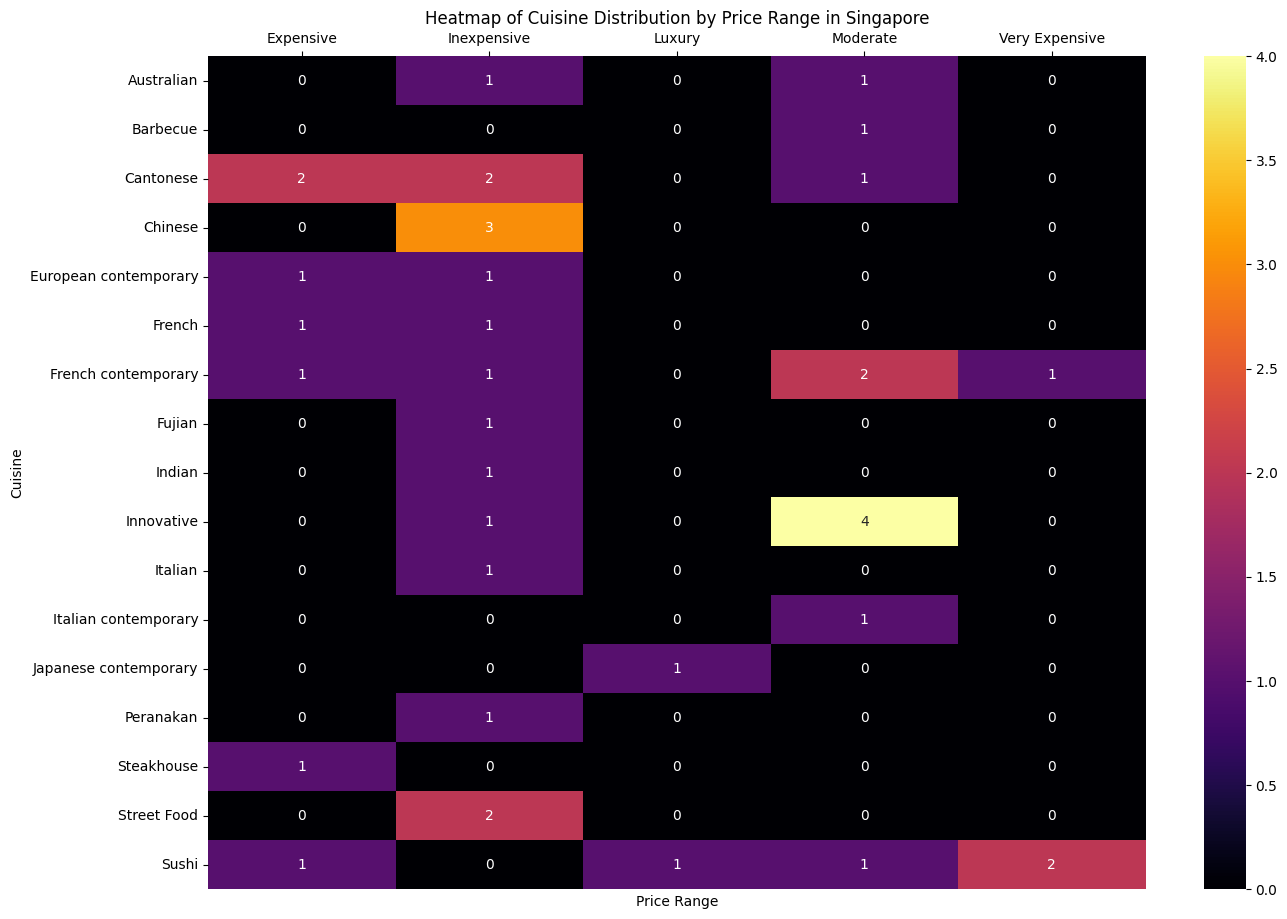

In [33]:
#Plotting a heatmap
heatmap_data = singapore_restaurants.pivot_table(index='cuisine', columns='price_group', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='inferno', annot=True, fmt='d')
plt.title('Heatmap of Cuisine Distribution by Price Range in Singapore')
plt.xlabel('Price Range')
plt.ylabel('Cuisine')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.gca().xaxis.tick_top() #name columns on top
plt.show()

**Geographic Distribution of Michelin star Cuisine Types in Singapore:**

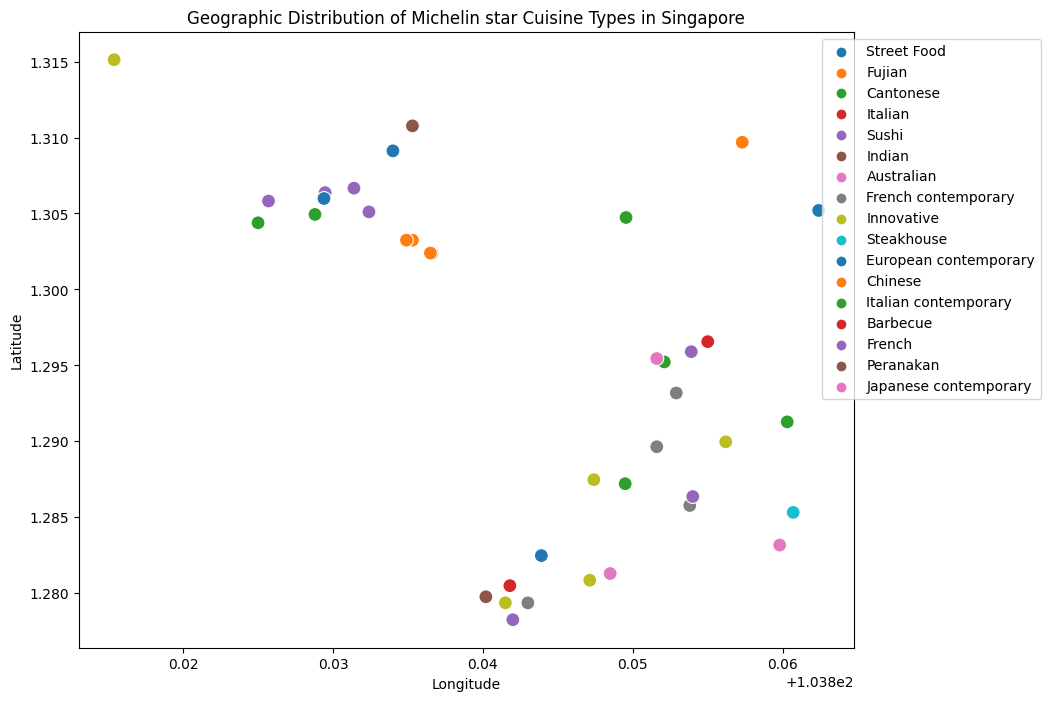

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=singapore_restaurants, hue='cuisine', palette='tab10', s=100)
plt.title('Geographic Distribution of Michelin star Cuisine Types in Singapore')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


**Conclusion:**

* Certain cuisine types, such as Fujian and Cantonese, appear to be geographically clustered, suggesting that restaurants of these types are located near each other.
* Other cuisines, like Street Food, Italian and Sushi, are more dispersed across the region, indicating a wider geographic distribution.

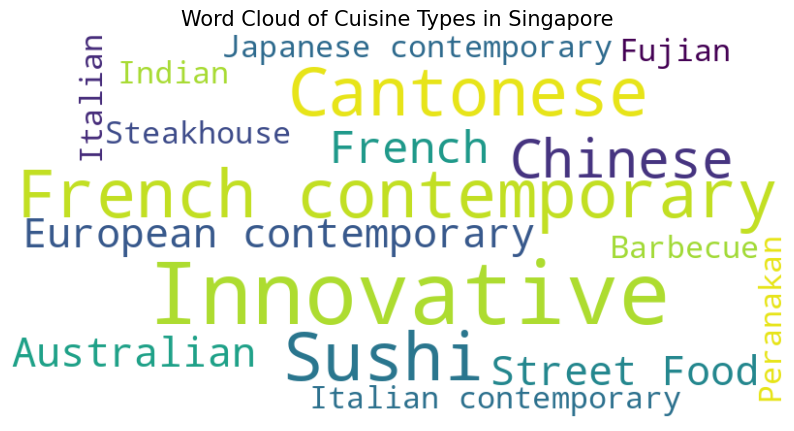

In [35]:
from wordcloud import WordCloud

cuisine_counts_sin = singapore_restaurants['cuisine'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cuisine_counts_sin)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Word Cloud of Cuisine Types in Singapore', fontsize=15)
plt.show()

# **Conclusion:**

Challgenes and Limitations:
- Small sample size (does not include all or many of the Michelin-awarded restaurants globally for the years of 2018 and 2019)
- Outdated data (2018 and 2019)
- A restaurant rating column and restaurant facilities/characteristics column, could have provide more insight to the analysis.
- The significant 'Unknown' category highlights the need for more consistent data collection in future analyses.

* The sample size itself can be considered incomplete and outdated, as it does not contain all Michelin Restaurants Worldwide for the years of 2018 and 2019, therefore a larger and more complete sample size would have been more representative of real facts, so the marketing team could use/create a Michelin data based on the data available on the Michelin Star company website and other reliable sources.

Insights:

* The predominance of 1-star Michelin restaurants suggests that while many establishments meet the high standards required to earn a star, fewer achieve the excellence needed for 2 or 3 stars. 

* There´s a diverse range of pricing categories among Singapore restaurants.

* The top 10 cuisines in Singapore are Innovative, French contemporary, Cantonese and Sushi.

* The diversity in price groups within popular cuisines like Japanese and Cantonese indicates a healthy competitive market where consumers can enjoy a wide range of dining experiences. This can inform restaurant owners and marketers about consumer preferences and pricing strategies.

* The clustering of specific cuisine types in certain areas suggests popular dining districts, while the dispersed nature of other types indicates a widespread appreciation for high-quality dining throughout the city. This distribution provides valuable insights for restaurateurs and market analysts about the gastronomic map of Singapore.

Recommendations:

* Consider diversifying the price range offerings within popular cuisines to attract a broader customer base.

* Focus on maintaining high standards to potentially earn Michelin stars, which can significantly boost a restaurant's reputation.

* Monitor trends in Michelin star distribution and price range categories to identify emerging culinary trends and potential investment opportunities.

* Use the insights from cuisine popularity and price range distribution to forecast consumer behavior and dining preferences and, therefore, make informed decisions to enhance their culinary experiences, business strategies, and market analyses.
 
* Consider creating/updating a Michelin star dataset to achieve a çarger and more complete sample size for a more representative Michelin star facts.